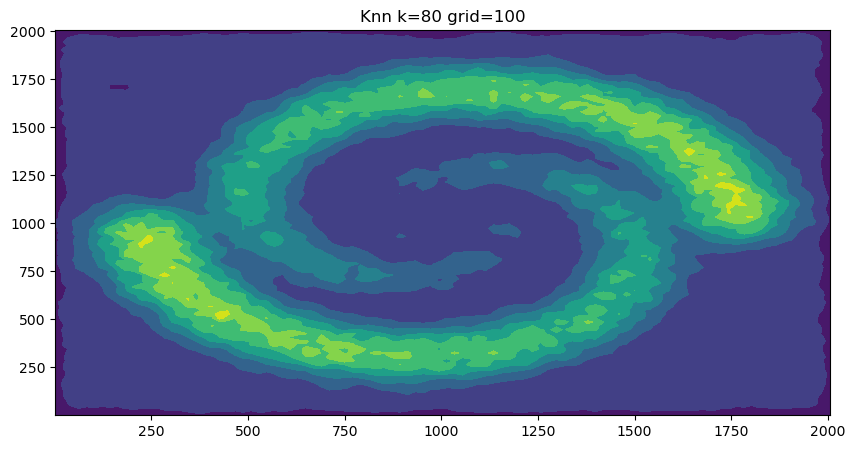

In [9]:
import numpy as np
from TD.kernels import Knn
import matplotlib.pyplot as plt

def print_2D_density(density, min_xy, max_xy, grid: int, title: str):
    x_range,y_range = np.linspace(min_xy[0], max_xy[0], grid), np.linspace(min_xy[1], max_xy[1], grid)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[density(np.array([x, y])) for x in x_range] for y in y_range])
    plt.figure(figsize=(10, 5))
    plt.contourf(X, Y, Z, cmap="viridis")
    plt.title(title)
    plt.show()  ### Use plt.savefig(f'{title}.png') to save to a file instead of displaying

mydata = np.loadtxt("csv/double_spiral.csv", delimiter=" ", dtype=float)
vk = 80
myknn = Knn(2, mydata, vk, 1.0)
grid = 100

print_2D_density(myknn.density, -np.ceil(-mydata.min(axis=0)).astype(int), np.ceil(mydata.max(axis=0)).astype(int), grid,  f"Knn k={vk} grid={grid}")

In [3]:
import numpy as np
from TD.kernels import Knn
import matplotlib.pyplot as plt

mydata = np.loadtxt("csv/galaxies_3D-short.csv", delimiter=" ", dtype=float)

vk = 10
myknn = Knn(3, mydata, vk, 1.0)

for i in range(4):
    myknn.meanshift(vk)

In [9]:
np.savetxt('csv/galaxies_3D-short_shift.xyz', np.array(myknn.data), fmt='%.8f')